# ESBS Python courses TD 3

## Handling protein coordinates with numpy 

The purpose of these exercises is to introduce some elementary geometrical calculations on protein structural coordinates from a PDB file. During this work, you will see how to organize protein coordinates unsing Python dictionaries. We will also exploit the marvelous graphic library Matplotlib.

Most of the calculations that will be introduced here are usually performed using dedicated softwares like Pymol. However, knowing the detailed process is essential to acquire a control of the calculations you are doing.

### Structure of a PDB file

The Protein DAta Bank contains all 3D structures that are determined over the world (https://www.rcsb.org/). We will analyse one record (file) of the database that describe a recently determined Covid ACE2 protein (7kmb), in complex with another protein (angiotensin). The PDB file is a text file where every line contains one type of information. The type of information is described by a keyword such as ATOM, REMARK etc... 

Within a line, informations such as atom name, residue name are specified using a fixed number of characters. The exact format of an ATOM record of the PDB is found here:

<pre>
COLUMNS        DATA  TYPE    FIELD        DEFINITION
-------------------------------------------------------------------------------------
 1 -  6        Record name   "ATOM  "
 7 - 11        Integer       serial       Atom  serial number.
13 - 16        Atom          name         Atom name.
17             Character     altLoc       Alternate location indicator.
18 - 20        Residue name  resName      Residue name.
22             Character     chainID      Chain identifier.
23 - 26        Integer       resSeq       Residue sequence number.
27             AChar         iCode        Code for insertion of residues.
31 - 38        Real(8.3)     x            Orthogonal coordinates for X in Angstroms.
39 - 46        Real(8.3)     y            Orthogonal coordinates for Y in Angstroms.
47 - 54        Real(8.3)     z            Orthogonal coordinates for Z in Angstroms.
55 - 60        Real(6.2)     occupancy    Occupancy.
61 - 66        Real(6.2)     tempFactor   Temperature  factor.
77 - 78        LString(2)    element      Element symbol, right-justified.
79 - 80        LString(2)    charge       Charge  on the atom.
</pre>

### Example :

<pre>
         1         2         3         4         5         6         7         8
12345678901234567890123456789012345678901234567890123456789012345678901234567890
ATOM     32  N  AARG A  -3      11.281  86.699  94.383  0.50 35.88           N  
ATOM     33  CA AARG A  -3      12.353  85.696  94.456  0.50 36.67           C
ATOM     34  C  AARG A  -3      13.559  86.257  95.222  0.50 37.37           C
ATOM     35  O  AARG A  -3      13.753  87.471  95.270  0.50 37.74           O
ATOM     36  CB AARG A  -3      12.774  85.306  93.039  0.50 37.25           C
ATOM     37  CG AARG A  -3      11.754  84.432  92.321  0.50 38.44           C
ATOM     38  CD AARG A  -3      11.698  84.678  90.815  0.50 38.51           C
ATOM     39  NE AARG A  -3      12.984  84.447  90.163  0.50 39.94           N
</pre>


## Exercice 1: Reading the PDB file

The following code is reading all lines of a PDB file. Modify the script in order to return :
    1. a dictionary of atom identifyers (atnames). 
    2. a numpy array of dimensions 3 column x Natoms (coordinates).
    3. a dictionary of sequences (one letter code) contained in each chain (sequences).
    
The dictionary should have the following stucture :

atnames = { 'A' : { 1 : { 'CA' : 0, 'N' : 1, 'CB ...}}}

atnames is a three-levels dictionary with :
    'A' key of single character chain Id
    1 key for the resicue number
    'CA' key for the atom name : the values are the line number at which coordinates of the atom are found in the coordinates array
    
sequences = { 'A' : 'HGDFSHRESD', ...}






    

In [39]:
# To be completed where indicated
import numpy as np
def read_pdb(fname):
    """ This function reads all the lines of a file named fname and returns 3 objects
        1. a dictionary of atom identifyers (atnames). 
        2. a numpy array of dimensions 3 column x Natoms (coord).
        3. a dictionary of sequences (one letter code) contained in each chain (sequences).
    """
    
    aa_name = # TO BE COMPLETED
    
    with open(fname,'r') as pdb:
        all_lines = pdb.readlines()
        
    atnames = {}    # Create an empty dictionary
    sequences = {}  # Create an empty dictionary
    coord = []
    
    ncoord = 0   # Counter for atom coordinates
    for line in all_lines:
        if line[:4] == "ATOM":
            atnum = int(line[6:11])
            atom = line[12:16].strip()
            altloc = line[16:17]
            resnam = line[17:20]
            chain = line[21:22]
            resnum = # TO BE COMPLETED
            insert = line[26:27]
            atx = # TO BE COMPLETED
            aty = # TO BE COMPLETED
            atz = # TO BE COMPLETED
            qf = float(line[54:60])
            bf = float(line[60:66])
        
            # Store coordinates in a 2-D numpy array
            if len(coord) == 0 :
                coord = np.array([[atx,aty,atz]])
            else:
                coord = np.append(coord,[[atx,aty,atz]],axis=0)
            
            # Store Atom Id
            if chain not in atnames: 
                # Create a new entry for the chain
                atnames[chain] = {}
                sequences[chain] = ''
                
            if resnum not in atnames[chain]:
                # Create a new residue entry
                # TO BE COMPLETED

            atnames[chain][resnum][atom] = ncoord
            ncoord += 1
                
    return coord,atnames,sequences


In [43]:
fn = "7kmb.pdb"
coord, names,seq = read_pdb(fn)
print ("The file {:} contains {:} coordinates in {:} chains".format(fn,len(coord),len(seq)))

The file 7kmb.pdb contains 6383 coordinates in 2 chains


## Exercice 2: Computing total mass of the protein

Write a function that computes the total mass of each chain of the protein complex. This function is useful in the field of **proteomics**, where mass of protein fragments are used to identify the protein.


In [46]:
def mass(names):
    """ Computes the mass of a protein from a dictionary returned by the read_pdb function. 
        The atom type is given by the first letter of the atom name
        Returns a dictionary with chains as key and total mass of a chain as values
    """
    
    amd = {'C' : 12.01074, 'S' : 32.075, 'N' : 14.0067, 'O' : 15.9994, 'H' : 1.00794} # Dictionary of atomic mass
    mass_dict = {}
    
    mass = 0.
    for chain in names:
        for resi in names[chain]:
            for atom in names[chain][resi]:
                # TO BE COMPLETED
        
    return mass_dict

In [47]:
print (mass(names))

{'F': 64242.43043999785, 'G': 84309.03737999545}


## Exercise 3. : Analysis of CA-CA distances

The distance between the CA(i) and CA(i+3) atoms is a good  indicator of the secondary structure. 

### 3.1. Write a function dist that computes the distance between two atoms of the coord array.

   Hint : the numpy function norm (from numpy.linalg library) computes the norm of a vector encoded as a numpy array

The function should take the following parameters:

- atom number i (rank of first atom)
- atom number j (rank of second
- coord (the 3=Natom numpy array of coordinates)

In [52]:
print (dist(1,3,coord))

2.3989499786364417


### 3.2. Accessing the coordinates

To ease the access to a specific coordinate, or to a specific set of coordinates, we need to build index functions. For instance, we would like to get the indexes of all CA carbons writing :

get_id('CA',names)

This function should return a dictionary with chain Id as key and an array of integers as values. The integers are the indexes of the corresponding coordinates.

Complete the function get_id below :

In [54]:
def get_id(names, atname = 'CA'):
    """ Returns the list of indexes corresponding to a given atom name (atname)
        names is a dictionary of atom names given by the readpdb function
    """
    
    coord_index = {}  # A dictionary of coordinates index
    index = 0
    for chain in names:
        coord_index[chain] = []  # Initialize a list for each chain
        for resi in names[chain]:
            for atom in names[chain][resi]:
                # TO BE COMPLETED

    return coord_index

In [55]:
print (get_id(names,'CA'))

{'F': [1, 7, 14, 22, 31, 40, 49, 54, 63, 70, 81, 89, 97, 106, 117, 125, 135, 144, 149, 158, 166, 174, 185, 197, 206, 212, 218, 226, 231, 237, 251, 259, 271, 279, 286, 294, 302, 309, 318, 327, 335, 342, 351, 359, 367, 375, 383, 388, 392, 400, 409, 423, 429, 434, 445, 453, 462, 471, 480, 486, 493, 501, 506, 515, 523, 535, 542, 550, 559, 568, 576, 585, 593, 601, 608, 615, 624, 632, 641, 649, 658, 663, 671, 680, 689, 697, 701, 707, 713, 720, 728, 734, 743, 751, 760, 766, 775, 786, 794, 802, 809, 817, 825, 833, 840, 848, 854, 861, 869, 881, 887, 894, 898, 907, 914, 920, 928, 935, 943, 951, 958, 967, 976, 982, 990, 998, 1006, 1015, 1022, 1026, 1034, 1042, 1051, 1059, 1067, 1072, 1080, 1086, 1094, 1102, 1114, 1122, 1131, 1142, 1150, 1164, 1169, 1183, 1192, 1198, 1212, 1223, 1229, 1238, 1245, 1249, 1258, 1267, 1275, 1286, 1293, 1301, 1313, 1322, 1331, 1343, 1350, 1357, 1365, 1374, 1382, 1391, 1399, 1404, 1415, 1420, 1428, 1438, 1450, 1459, 1467, 1479, 1483, 1491, 1503, 1517, 1528, 1532, 1540, 

### 3.3. Drawing the CA(i)-CA(i+3) distances

Everything is now ready to plot the CA-CA distances. 

Complete the plot function below :

<IPython.core.display.Javascript object>


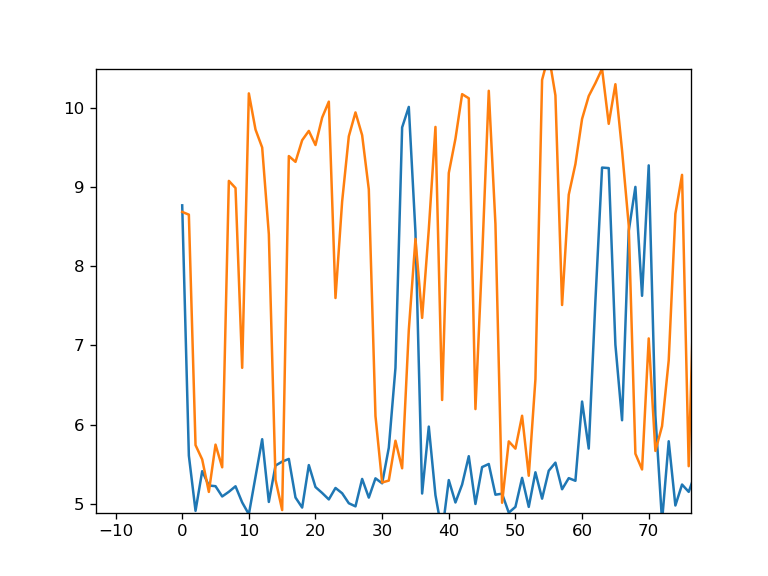

In [69]:
# This line may have to be changed for people using colab
import matplotlib.pyplot as plt
%matplotlib notebook 


def plot_caca(names,coord,delta = 3):
    """ This function plots distances between ca and ca atoms separated by a given number of atoms (delta)"""
    
    fig, ax = plt.subplots()
    ca_id = get_id(names,'CA')

    for ch in ca_id:
        cadist = []
        atom_id = np.array(ca_id[ch])
        for i in range(len(atom_id)-delta):
            # TO BE COMPLETED
            
        plt.plot(cadist)

plot_caca(names,coord)

## Exercise 4. : Plotting the P(r) function

The shape of the protein, or protein complex may be obtained using a biophysical method named Small Angle X-Ray Scattering [(SAXS)](https://en.wikipedia.org/wiki/Small-angle_X-ray_scattering). This function provides two structural informations among others, the P(r) function and Dmax. 

- Dmax is the maximal interatomic distance
- P(r) is a function that provides the distribution of all pairwise interatomic distances. Due to the use of X-ray, only heavy atoms are scattering.

### 4.1 Selecting on atomic mass 

We will take advantage of numpy array vectorial capabilities for this exercise. To select on atomic mass, we need to build an array that contains all atom masses. This array will have the same number of lines as the coordinate array (coord), but only one column.

Modify the function mass (mass2) to return such an array

In [72]:
# Correction: to be deleted
def mass2(names):
    """ Computes the mass of a protein from a dictionary returned by the read_pdb function. 
        The atom type is given by the first letter of the atom name
        Returns a dictionary with chains as key and total mass of a chain as values
        and an array of individual masses
    """
    
    amd = {'C' : 12.01074, 'S' : 32.075, 'N' : 14.0067, 'O' : 15.9994, 'H' : 1.00794} # Dictionary of atomic mass
    mass_dict = {}
    mass_vector = []  # Initialize an empty list of atom mass
    
    mass = 0.
    # TO BE COMPLETED
        
    return mass_dict,np.array(mass_vector)


### 4.2 Computing the distance matrix

The coordinates of heavy aroms can be easely selected thanks to the array of atomic mass using the following line :

How many atoms are discarded ?


In [79]:
mass_vec = mass2(names)[1] # An array of vector masses
coord_heavy = coord[mass_vec > 1.2]

It is now possible to compute the distance matrix. Beware that this calculation may be long.

In [83]:
dist_vec = mat_dist(coord_heavy)
print ("Dmax : {:} Å".format(dist_vec.max()))

Dmax : 110.94998507886336 Å


And plot the P(r) distribution of distances

<IPython.core.display.Javascript object>


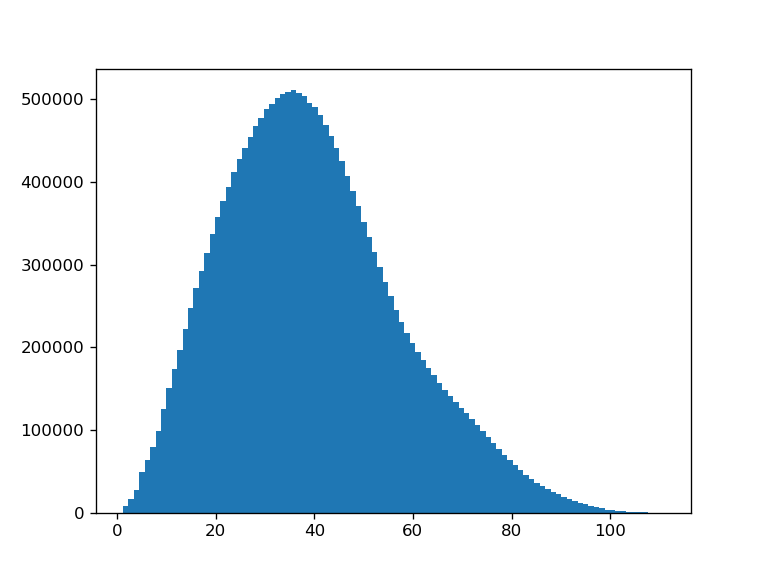

In [86]:
fig, ax = plt.subplots()
p = plt.hist(dist_vec,bins=100)